In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train.csv')
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


### Checking for null values

In [3]:
data.isna().sum().sum()

5558

### Removing columns which have more than 70% of null values


In [4]:
data=data.drop(columns=['Alley','MiscFeature','Fence','PoolQC'])

In [5]:
data.shape

(1168, 77)

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Handling the null values

In [7]:
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())

In [8]:
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])

In [9]:
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])

In [10]:
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])

In [11]:
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])

In [12]:
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])

In [13]:
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])

In [14]:
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])

In [15]:
data['GarageYrBlt']=data['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0])

In [16]:
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])

In [17]:
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])

In [18]:
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])

In [19]:
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])

In [20]:
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mean())

### Checking for columns which has 0 values

In [21]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of Empty values in column 
    count = (column ==0).sum()
    print('Count of empty values in column ', column_name, ' is : ', count)

Count of empty values in column  Id  is :  0
Count of empty values in column  MSSubClass  is :  0
Count of empty values in column  MSZoning  is :  0
Count of empty values in column  LotFrontage  is :  0
Count of empty values in column  LotArea  is :  0
Count of empty values in column  Street  is :  0
Count of empty values in column  LotShape  is :  0
Count of empty values in column  LandContour  is :  0
Count of empty values in column  Utilities  is :  0
Count of empty values in column  LotConfig  is :  0
Count of empty values in column  LandSlope  is :  0
Count of empty values in column  Neighborhood  is :  0
Count of empty values in column  Condition1  is :  0
Count of empty values in column  Condition2  is :  0
Count of empty values in column  BldgType  is :  0
Count of empty values in column  HouseStyle  is :  0
Count of empty values in column  OverallQual  is :  0
Count of empty values in column  OverallCond  is :  0
Count of empty values in column  YearBuilt  is :  0
Count of emp

We are not removing the 0 values since these are the possible values

### Checking the datatypes of the columns

In [22]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

In [23]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

### Creating seperate data frames for categorical and continuous data

In [24]:
data_categorical=data[['MSZoning','Street','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2','Heating', 'HeatingQC','CentralAir', 'Electrical','KitchenQual','Functional','Fireplaces','FireplaceQu', 'GarageType','GarageFinish','GarageCars','GarageQual', 'GarageCond','PavedDrive','SaleType','SaleCondition']]
data_continuous=data[['Id','MSSubClass','LotFrontage','LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','GarageYrBlt','GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold','SalePrice']]

In [25]:
data_continuous

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,70.98847,4928,6,5,1976,1976,0.0,0,...,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.00000,15865,8,6,1970,1970,0.0,823,...,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.00000,9920,7,5,1996,1997,0.0,0,...,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.00000,11751,6,6,1977,1977,480.0,0,...,0,122,0,0,0,0,0,1,2010,190000
4,422,20,70.98847,16635,6,7,1977,2000,126.0,0,...,240,0,0,0,0,0,0,6,2009,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,70.98847,9819,5,5,1967,1967,31.0,0,...,0,0,0,0,0,0,0,2,2010,122000
1164,554,20,67.00000,8777,4,5,1949,2003,0.0,0,...,0,96,0,0,0,0,0,5,2009,108000
1165,196,160,24.00000,2280,6,6,1976,1976,0.0,0,...,87,0,0,0,0,0,0,7,2009,148500
1166,31,70,50.00000,8500,4,4,1920,1950,0.0,0,...,0,54,172,0,0,0,0,7,2008,40000


In [26]:
data_categorical

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,...,1,TA,Attchd,RFn,2,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,...,1,TA,Attchd,Unf,2,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,...,1,TA,Attchd,Unf,2,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,1,TA,Attchd,RFn,2,TA,TA,Y,COD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,...,1,TA,Attchd,Fin,2,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,0,Gd,Detchd,Unf,1,TA,TA,Y,WD,Normal
1164,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,...,0,Gd,Detchd,Fin,2,TA,TA,N,WD,Normal
1165,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,...,1,TA,Attchd,Unf,2,TA,TA,Y,WD,Normal
1166,C (all),Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,...,0,Gd,Detchd,Unf,1,TA,Fa,N,WD,Normal


### Checking distribution of continuous data

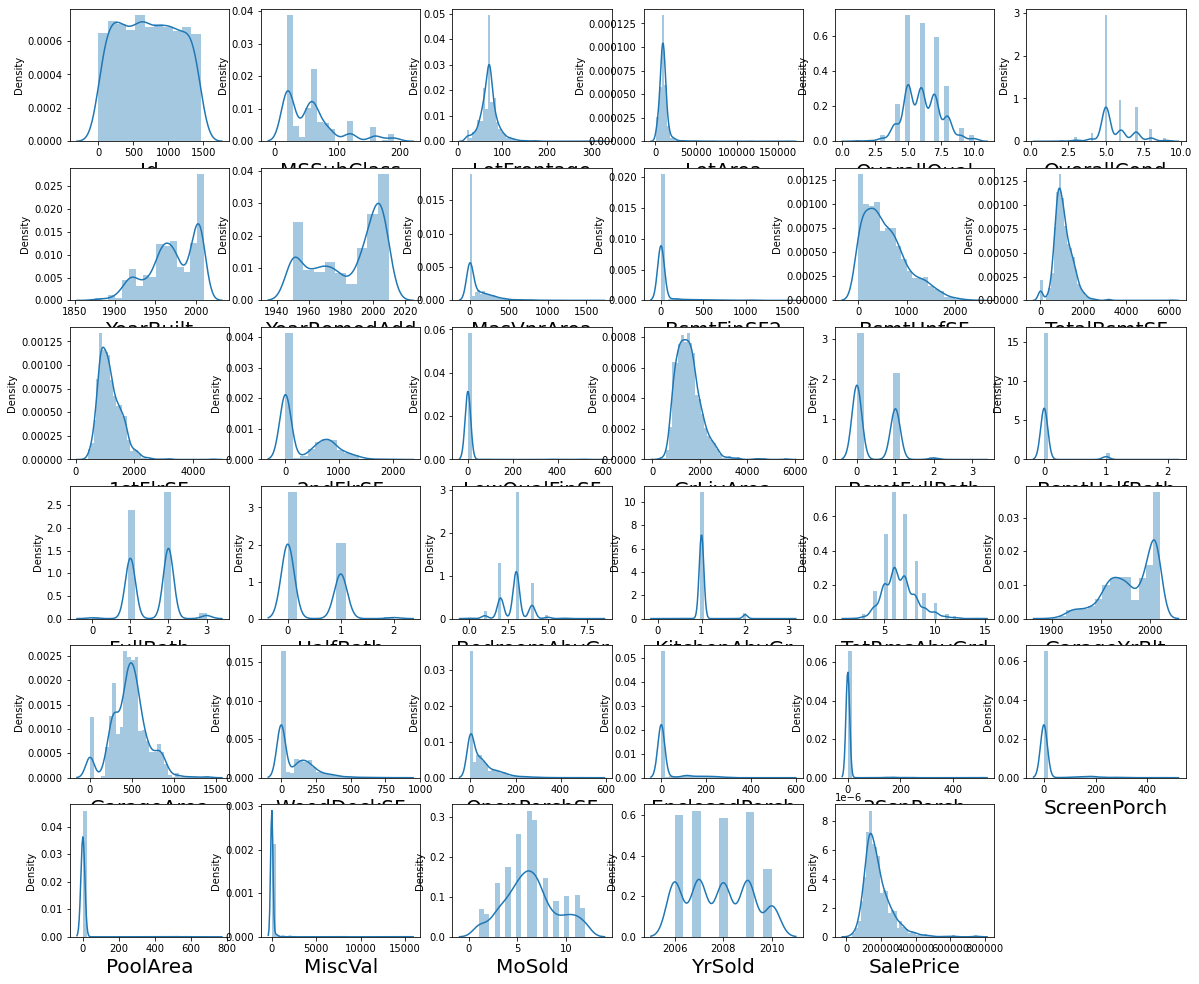

In [27]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data_continuous:
    if plotnumber<=35:
        ax=plt.subplot(7,6,plotnumber)
        sns.distplot(data_continuous[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


### Visualization of the Categorical data

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


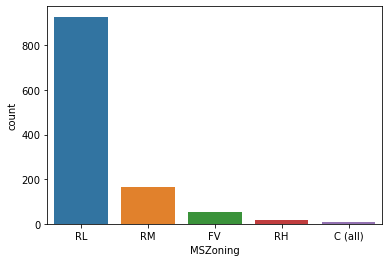

In [28]:
ax=sns.countplot(x='MSZoning',data=data_categorical)
print(data_categorical['MSZoning'].value_counts())

Pave    1164
Grvl       4
Name: Street, dtype: int64


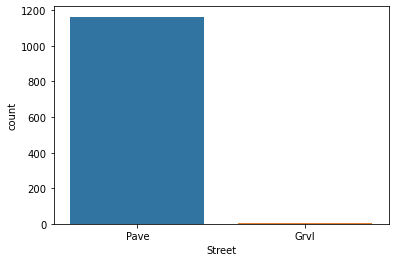

In [29]:
ax=sns.countplot(x='Street',data=data_categorical)
print(data_categorical['Street'].value_counts())

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


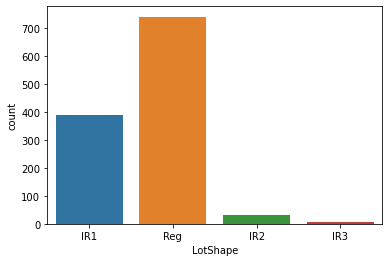

In [30]:
ax=sns.countplot(x='LotShape',data=data_categorical)
print(data_categorical['LotShape'].value_counts())

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


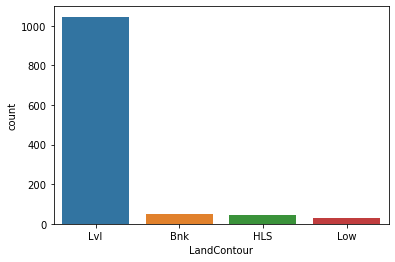

In [31]:
ax=sns.countplot(x='LandContour',data=data_categorical)
print(data_categorical['LandContour'].value_counts())

AllPub    1168
Name: Utilities, dtype: int64


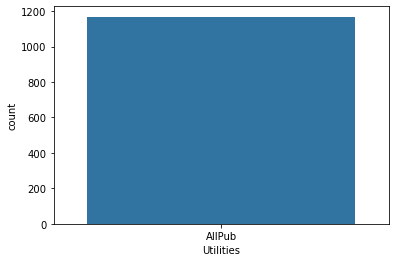

In [32]:
ax=sns.countplot(x='Utilities',data=data_categorical)
print(data_categorical['Utilities'].value_counts())

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


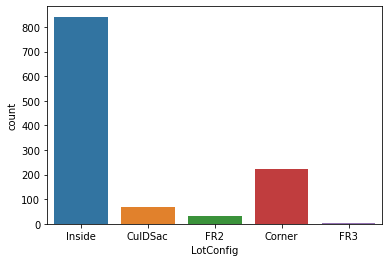

In [33]:
ax=sns.countplot(x='LotConfig',data=data_categorical)
print(data_categorical['LotConfig'].value_counts())

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


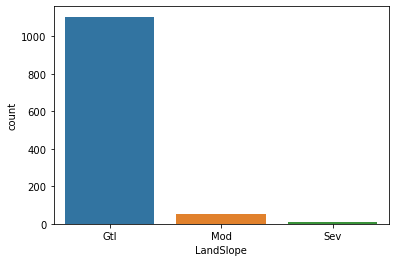

In [34]:
ax=sns.countplot(x='LandSlope',data=data_categorical)
print(data_categorical['LandSlope'].value_counts())

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


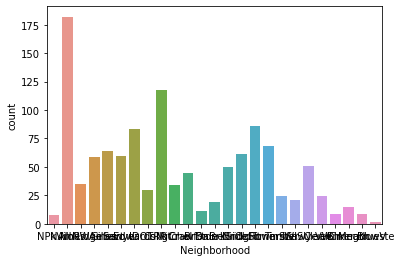

In [35]:
ax=sns.countplot(x='Neighborhood',data=data_categorical)
print(data_categorical['Neighborhood'].value_counts())

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


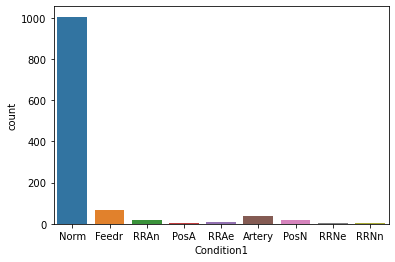

In [36]:
ax=sns.countplot(x='Condition1',data=data_categorical)
print(data_categorical['Condition1'].value_counts())

Norm      1154
Feedr        6
Artery       2
PosN         2
RRNn         1
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64


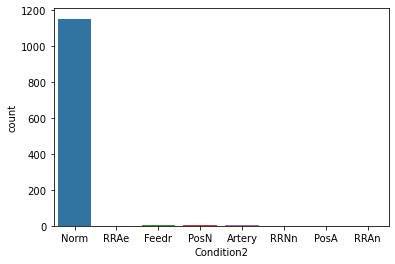

In [37]:
ax=sns.countplot(x='Condition2',data=data_categorical)
print(data_categorical['Condition2'].value_counts())

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


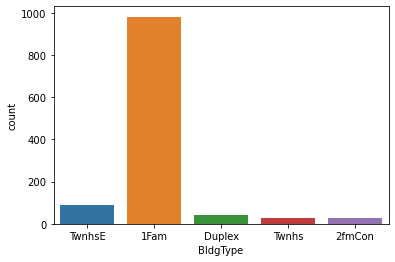

In [38]:
ax=sns.countplot(x='BldgType',data=data_categorical)
print(data_categorical['BldgType'].value_counts())

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


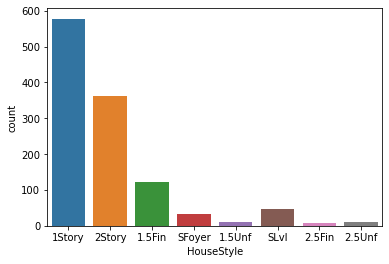

In [39]:
ax=sns.countplot(x='HouseStyle',data=data_categorical)
print(data_categorical['HouseStyle'].value_counts())

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


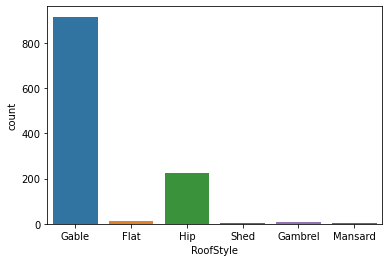

In [40]:
ax=sns.countplot(x='RoofStyle',data=data_categorical)
print(data_categorical['RoofStyle'].value_counts())

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
ClyTile       1
Membran       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64


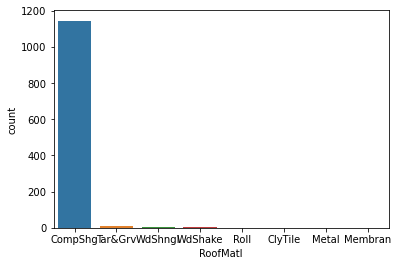

In [41]:
ax=sns.countplot(x='RoofMatl',data=data_categorical)
print(data_categorical['RoofMatl'].value_counts())

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
AsbShng     19
WdShing     19
Stone        2
BrkComm      1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64


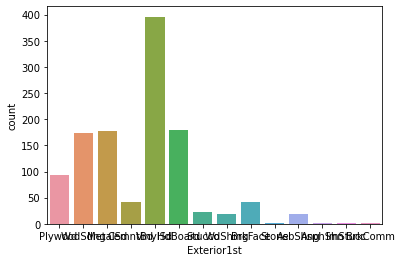

In [42]:
ax=sns.countplot(x='Exterior1st',data=data_categorical)
print(data_categorical['Exterior1st'].value_counts())

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


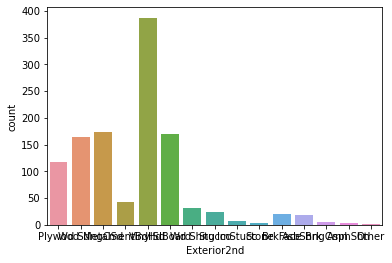

In [43]:
ax=sns.countplot(x='Exterior2nd',data=data_categorical)
print(data_categorical['Exterior2nd'].value_counts())

None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


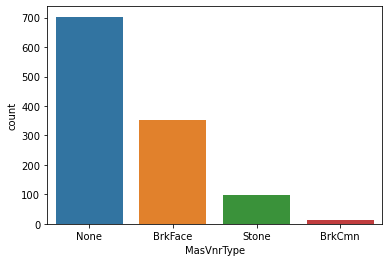

In [44]:
ax=sns.countplot(x='MasVnrType',data=data_categorical)
print(data_categorical['MasVnrType'].value_counts())

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


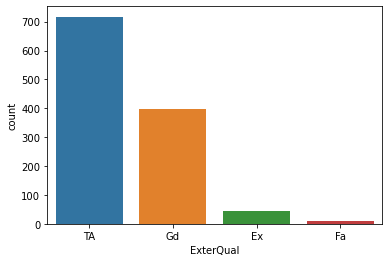

In [45]:
ax=sns.countplot(x='ExterQual',data=data_categorical)
print(data_categorical['ExterQual'].value_counts())

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


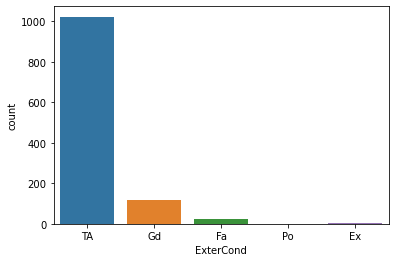

In [46]:
ax=sns.countplot(x='ExterCond',data=data_categorical)
print(data_categorical['ExterCond'].value_counts())

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


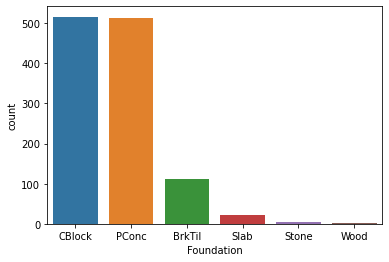

In [47]:
ax=sns.countplot(x='Foundation',data=data_categorical)
print(data_categorical['Foundation'].value_counts())

TA    547
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


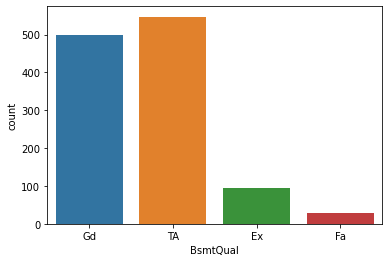

In [48]:
ax=sns.countplot(x='BsmtQual',data=data_categorical)
print(data_categorical['BsmtQual'].value_counts())

TA    1071
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


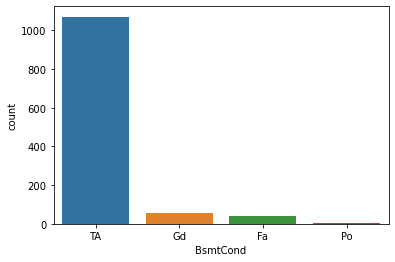

In [49]:
ax=sns.countplot(x='BsmtCond',data=data_categorical)
print(data_categorical['BsmtCond'].value_counts())

No    787
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


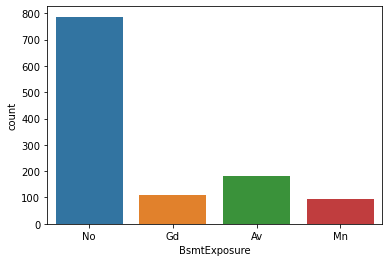

In [50]:
ax=sns.countplot(x='BsmtExposure',data=data_categorical)
print(data_categorical['BsmtExposure'].value_counts())

Unf    375
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


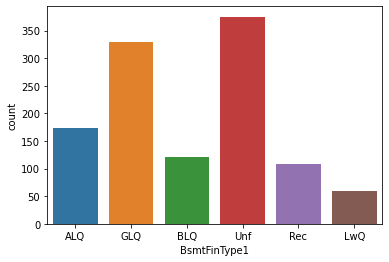

In [51]:
ax=sns.countplot(x='BsmtFinType1',data=data_categorical)
print(data_categorical['BsmtFinType1'].value_counts())

0      375
24      10
16       8
20       5
616      5
      ... 
548      1
540      1
539      1
538      1
663      1
Name: BsmtFinSF1, Length: 551, dtype: int64


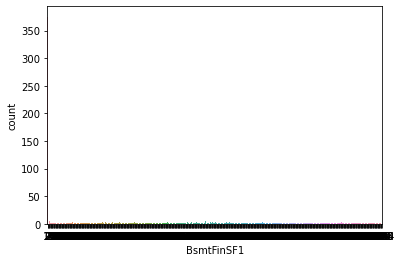

In [52]:
ax=sns.countplot(x='BsmtFinSF1',data=data_categorical)
print(data_categorical['BsmtFinSF1'].value_counts())

Unf    1033
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


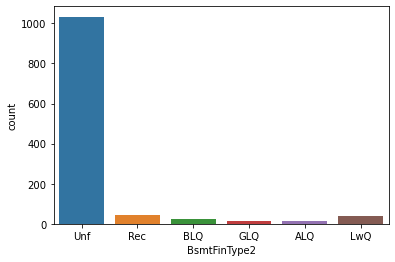

In [53]:
ax=sns.countplot(x='BsmtFinType2',data=data_categorical)
print(data_categorical['BsmtFinType2'].value_counts())

GasA     1143
GasW       14
Grav        5
Wall        4
OthW        1
Floor       1
Name: Heating, dtype: int64


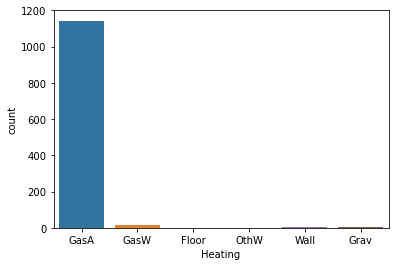

In [54]:
ax=sns.countplot(x='Heating',data=data_categorical)
print(data_categorical['Heating'].value_counts())

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


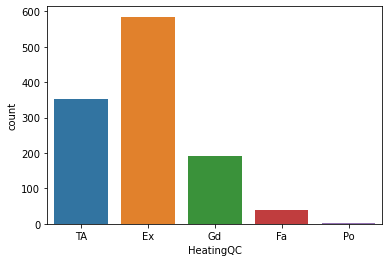

In [55]:
ax=sns.countplot(x='HeatingQC',data=data_categorical)
print(data_categorical['HeatingQC'].value_counts())

Y    1090
N      78
Name: CentralAir, dtype: int64


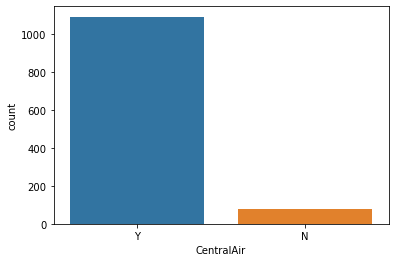

In [56]:
ax=sns.countplot(x='CentralAir',data=data_categorical)
print(data_categorical['CentralAir'].value_counts())

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


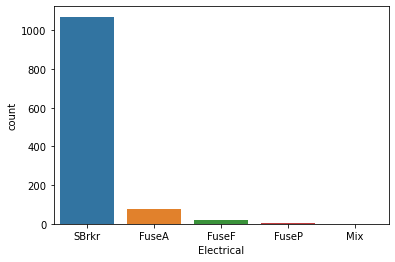

In [57]:
ax=sns.countplot(x='Electrical',data=data_categorical)
print(data_categorical['Electrical'].value_counts())

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


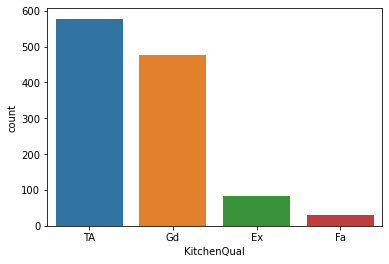

In [58]:
ax=sns.countplot(x='KitchenQual',data=data_categorical)
print(data_categorical['KitchenQual'].value_counts())

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


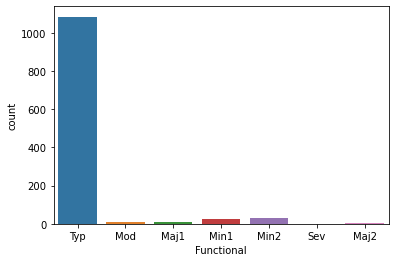

In [59]:
ax=sns.countplot(x='Functional',data=data_categorical)
print(data_categorical['Functional'].value_counts())

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64


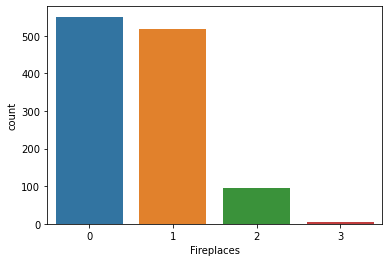

In [60]:
ax=sns.countplot(x='Fireplaces',data=data_categorical)
print(data_categorical['Fireplaces'].value_counts())

Gd    852
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64


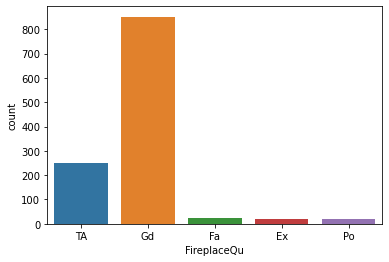

In [61]:
ax=sns.countplot(x='FireplaceQu',data=data_categorical)
print(data_categorical['FireplaceQu'].value_counts())

Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


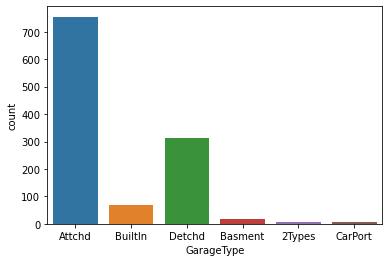

In [62]:
ax=sns.countplot(x='GarageType',data=data_categorical)
print(data_categorical['GarageType'].value_counts())

Unf    551
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


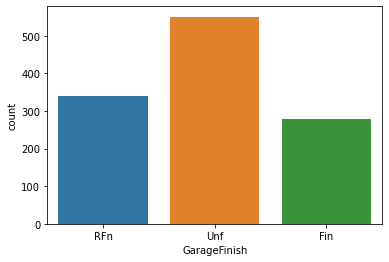

In [63]:
ax=sns.countplot(x='GarageFinish',data=data_categorical)
print(data_categorical['GarageFinish'].value_counts())

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64


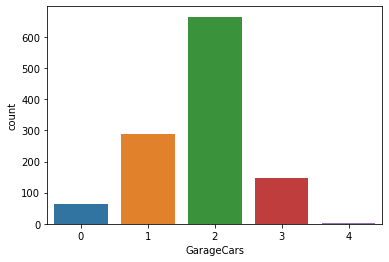

In [64]:
ax=sns.countplot(x='GarageCars',data=data_categorical)
print(data_categorical['GarageCars'].value_counts())

TA    1114
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64


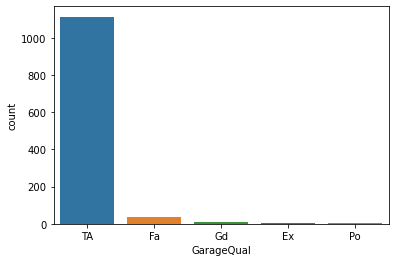

In [65]:
ax=sns.countplot(x='GarageQual',data=data_categorical)
print(data_categorical['GarageQual'].value_counts())

TA    1125
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


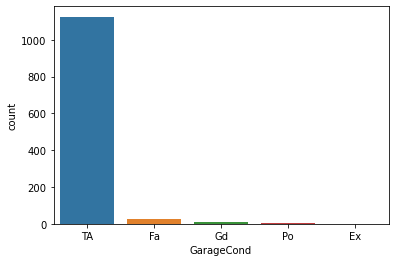

In [66]:
ax=sns.countplot(x='GarageCond',data=data_categorical)
print(data_categorical['GarageCond'].value_counts())

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


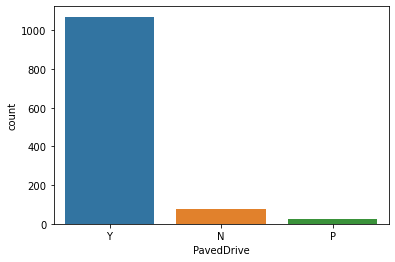

In [67]:
ax=sns.countplot(x='PavedDrive',data=data_categorical)
print(data_categorical['PavedDrive'].value_counts())

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64


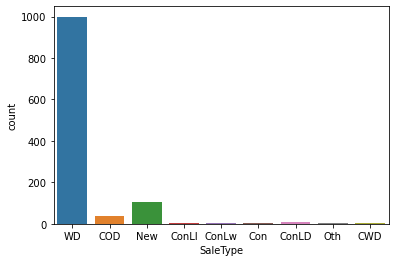

In [68]:
ax=sns.countplot(x='SaleType',data=data_categorical)
print(data_categorical['SaleType'].value_counts())

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


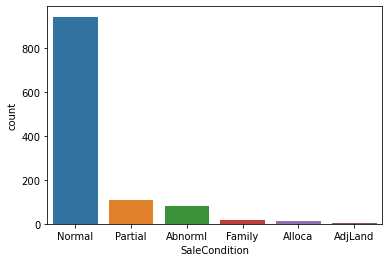

In [69]:
ax=sns.countplot(x='SaleCondition',data=data_categorical)
print(data_categorical['SaleCondition'].value_counts())

### Checking the correlation

In [70]:
data.corr()['SalePrice']

Id              -0.023897
MSSubClass      -0.060775
LotFrontage      0.323779
LotArea          0.249499
OverallQual      0.789185
OverallCond     -0.065642
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
BsmtFinSF1       0.362874
BsmtFinSF2      -0.010151
BsmtUnfSF        0.215724
TotalBsmtSF      0.595042
1stFlrSF         0.587642
2ndFlrSF         0.330386
LowQualFinSF    -0.032381
GrLivArea        0.707300
BsmtFullBath     0.212924
BsmtHalfBath    -0.011109
FullBath         0.554988
HalfBath         0.295592
BedroomAbvGr     0.158281
KitchenAbvGr    -0.132108
TotRmsAbvGrd     0.528363
Fireplaces       0.459611
GarageYrBlt      0.381997
GarageCars       0.628329
GarageArea       0.619000
WoodDeckSF       0.315444
OpenPorchSF      0.339500
EnclosedPorch   -0.115004
3SsnPorch        0.060119
ScreenPorch      0.100284
PoolArea         0.103280
MiscVal         -0.013071
MoSold           0.072764
YrSold          -0.045508
SalePrice        1.000000
Name: SalePr

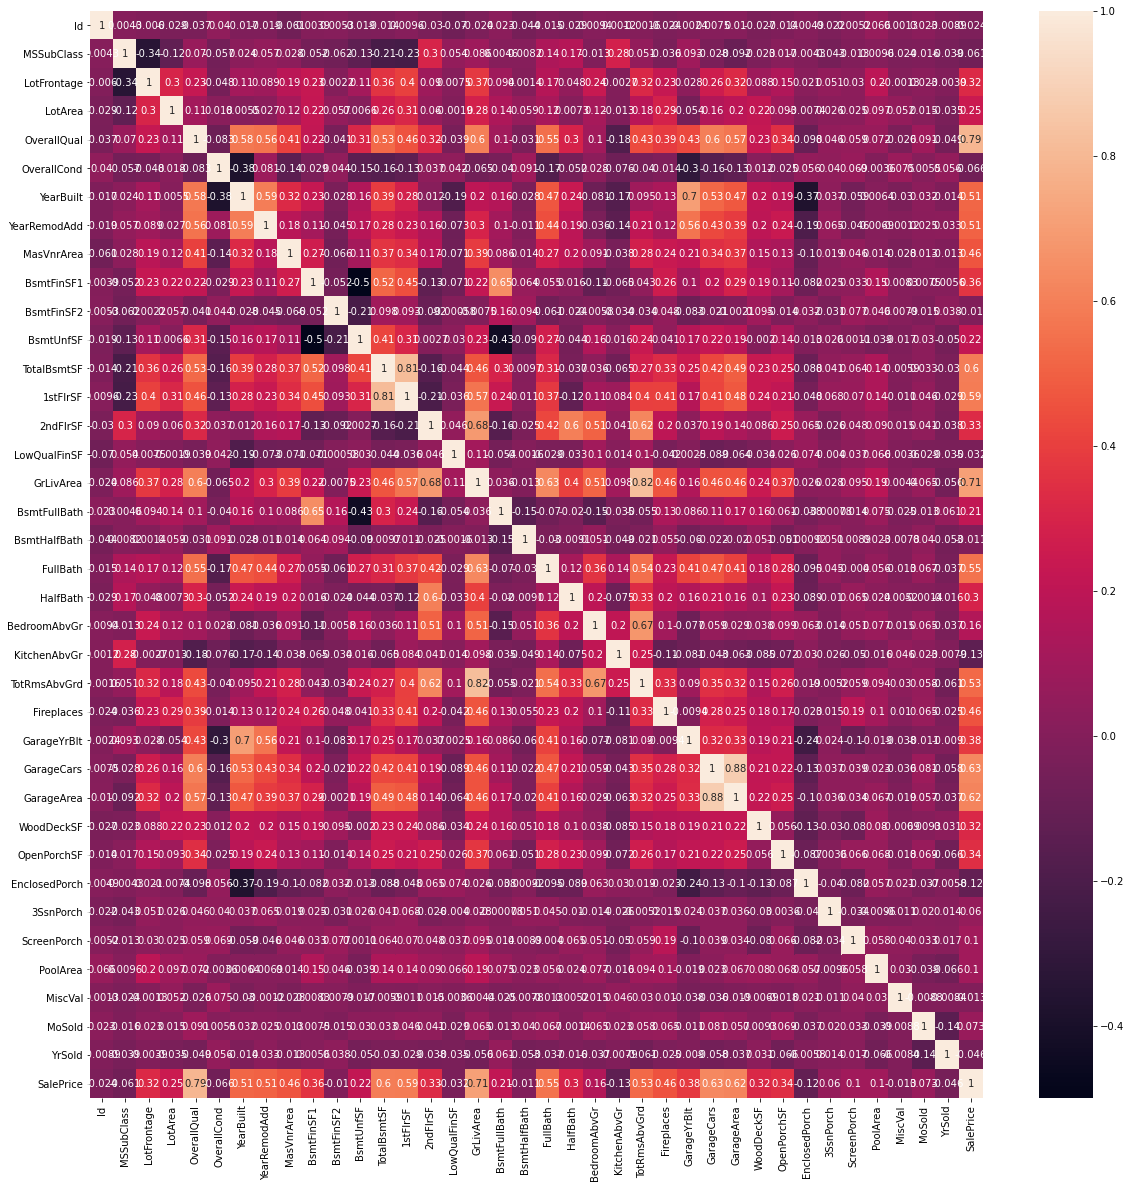

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Checking the columns which are positively and negatively correlated with the target variable

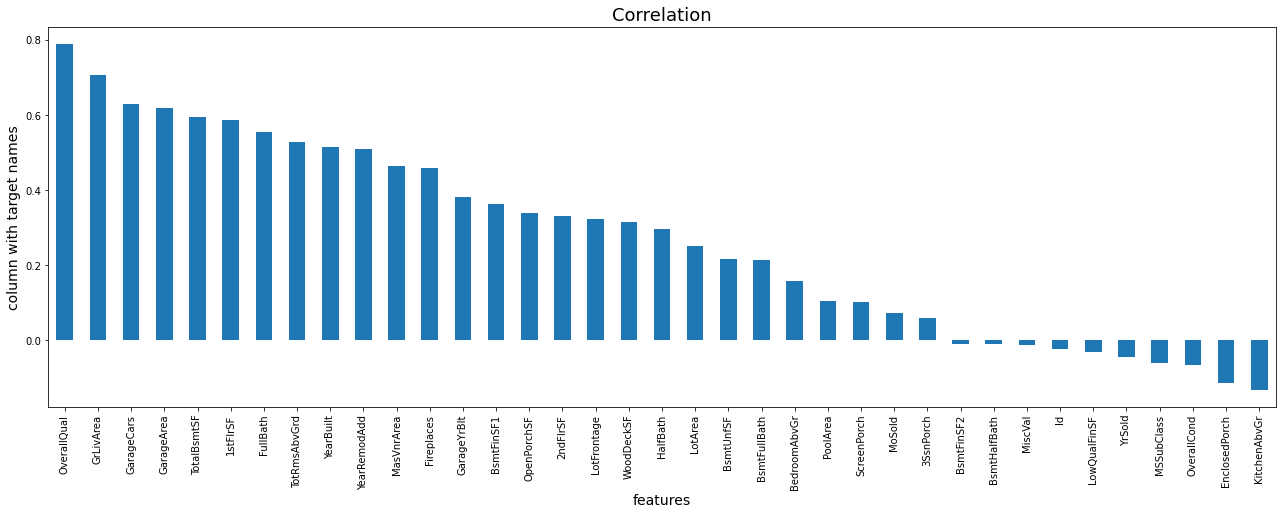

In [72]:
plt.figure(figsize=(22,7))
data.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar')
plt.xlabel('features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

### Removing columns which has less relation with the target variable

In [73]:
data=data.drop(columns=['Id','MSSubClass','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'])

In [74]:
data.shape

(1168, 62)

### Encoding the dataset

In [75]:
from sklearn.preprocessing import OrdinalEncoder

In [76]:
enc=OrdinalEncoder()

In [77]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [78]:
data

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,3.0,70.98847,4928,1.0,0.0,3.0,0.0,4.0,0.0,13.0,...,2,440,4.0,4.0,2.0,0,205,8.0,4.0,128000
1,3.0,95.00000,15865,1.0,0.0,3.0,0.0,4.0,1.0,12.0,...,2,621,4.0,4.0,2.0,81,207,8.0,4.0,268000
2,3.0,92.00000,9920,1.0,0.0,3.0,0.0,1.0,0.0,15.0,...,2,455,4.0,4.0,2.0,180,130,8.0,4.0,269790
3,3.0,105.00000,11751,1.0,0.0,3.0,0.0,4.0,0.0,14.0,...,2,546,4.0,4.0,2.0,0,122,0.0,4.0,190000
4,3.0,70.98847,16635,1.0,0.0,3.0,0.0,2.0,0.0,14.0,...,2,529,4.0,4.0,2.0,240,0,8.0,4.0,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3.0,70.98847,9819,1.0,0.0,3.0,0.0,4.0,0.0,19.0,...,1,280,4.0,4.0,2.0,0,0,8.0,4.0,122000
1164,3.0,67.00000,8777,1.0,3.0,3.0,0.0,4.0,0.0,7.0,...,2,520,4.0,4.0,0.0,0,96,8.0,4.0,108000
1165,3.0,24.00000,2280,1.0,3.0,3.0,0.0,2.0,0.0,13.0,...,2,440,4.0,4.0,2.0,87,0,8.0,4.0,148500
1166,0.0,50.00000,8500,1.0,3.0,3.0,0.0,4.0,0.0,9.0,...,1,250,4.0,1.0,0.0,0,54,8.0,4.0,40000


### Checking outliers using boxplot

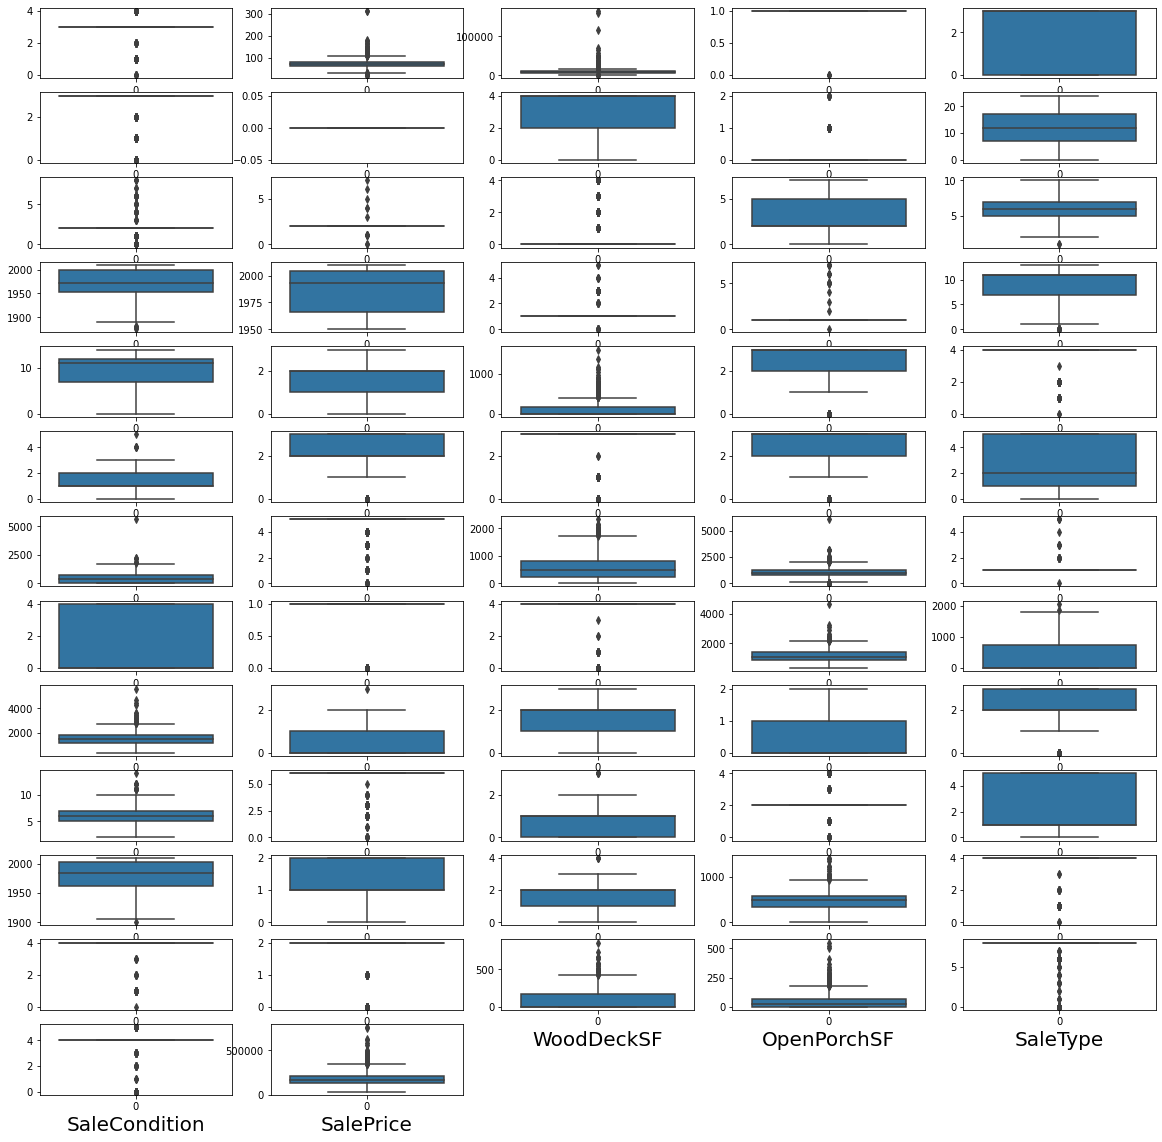

In [79]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=62:
        ax=plt.subplot(13,5,plotnumber)
        sns.boxplot(data=data[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We are not removing the outliers since these can be the possible outcomes and are present in the categorical columns

### Dividing dataset into dependent and independent variables

In [80]:
x=data.drop(columns='SalePrice')
y=data['SalePrice']


#### Checking skewness

In [81]:
x.skew()

MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
LotShape         -0.603775
                   ...    
PavedDrive       -3.274035
WoodDeckSF        1.504929
OpenPorchSF       2.410840
SaleType         -3.660513
SaleCondition    -2.671829
Length: 61, dtype: float64

### Removing skewness using power transform

In [82]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

### Scaling the data

In [83]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)

### Checking Multicolinearity using VIF(variance inflation factor)

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.428282,MSZoning
1,2.063167,LotFrontage
2,2.653613,LotArea
3,1.106466,Street
4,1.309425,LotShape
...,...,...
56,1.492636,PavedDrive
57,1.306729,WoodDeckSF
58,1.574347,OpenPorchSF
59,1.320238,SaleType


Multicollinearity exists so we have to remove columns

In [85]:
x=x.drop(columns=['1stFlrSF','2ndFlrSF','BsmtFinSF1'])

In [86]:
x

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,3.0,70.98847,4928,1.0,0.0,3.0,0.0,4.0,0.0,13.0,...,1.0,2,440,4.0,4.0,2.0,0,205,8.0,4.0
1,3.0,95.00000,15865,1.0,0.0,3.0,0.0,4.0,1.0,12.0,...,2.0,2,621,4.0,4.0,2.0,81,207,8.0,4.0
2,3.0,92.00000,9920,1.0,0.0,3.0,0.0,1.0,0.0,15.0,...,2.0,2,455,4.0,4.0,2.0,180,130,8.0,4.0
3,3.0,105.00000,11751,1.0,0.0,3.0,0.0,4.0,0.0,14.0,...,1.0,2,546,4.0,4.0,2.0,0,122,0.0,4.0
4,3.0,70.98847,16635,1.0,0.0,3.0,0.0,2.0,0.0,14.0,...,0.0,2,529,4.0,4.0,2.0,240,0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3.0,70.98847,9819,1.0,0.0,3.0,0.0,4.0,0.0,19.0,...,2.0,1,280,4.0,4.0,2.0,0,0,8.0,4.0
1164,3.0,67.00000,8777,1.0,3.0,3.0,0.0,4.0,0.0,7.0,...,0.0,2,520,4.0,4.0,0.0,0,96,8.0,4.0
1165,3.0,24.00000,2280,1.0,3.0,3.0,0.0,2.0,0.0,13.0,...,2.0,2,440,4.0,4.0,2.0,87,0,8.0,4.0
1166,0.0,50.00000,8500,1.0,3.0,3.0,0.0,4.0,0.0,9.0,...,2.0,1,250,4.0,1.0,0.0,0,54,8.0,4.0


In [87]:
x_new=power_transform(x)

In [88]:
x_new=sc.fit_transform(x_new)

In [89]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.412106,MSZoning
1,2.029850,LotFrontage
2,2.617949,LotArea
3,1.098070,Street
4,1.303498,LotShape
5,1.560619,LandContour
6,NaN,Utilities
7,1.151233,LotConfig
8,1.622852,LandSlope
9,1.235017,Neighborhood


### Finding the best random state

In [90]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
LR=LinearRegression()

In [91]:
maxAccu=0
maxRS=0
for i in range(0,10000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.20,random_state=i)
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_test)
    accu=r2_score(y_test,y_pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRs=i
print('Max accuracy is ',maxAccu,'on random state',maxRs)
   

Max accuracy is  0.8882562627506866 on random state 1028


### Splitting data into training and test data

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.20,random_state=1028)
    

### Linear Regression

In [93]:
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accu=r2_score(y_test,y_pred)
accu

0.8882562627506866

### Cross Validation

In [94]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(LR,x_new,y,cv=4)
print(cv_score.mean())

0.7876313432420814


### Regularization

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

#### Lasso

In [96]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'max_iter':[100,200,500,1000],'normalize':[True,False]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'max_iter': 100, 'normalize': True, 'random_state': 0}


In [97]:
ls=Lasso(alpha=10,random_state=0,max_iter=100,normalize=True)
ls.fit(x_train,y_train)

Lasso(alpha=10, max_iter=100, normalize=True, random_state=0)

In [98]:
ls_pred=ls.predict(x_test)
lss=r2_score(y_test,ls_pred)
lss

0.890031378599961

### Cross Validation

In [99]:
cv_score_Lasso=cross_val_score(ls,x_new,y,cv=4)
print(cv_score_Lasso.mean())

0.7887560758867924


#### Ridge

In [100]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'max_iter':[100,200,500,1000],'normalize':[True,False]}
Rg=Ridge()
clfr=GridSearchCV(Rg,parameters)
clfr.fit(x_train,y_train)
print(clfr.best_params_)

{'alpha': 0.1, 'max_iter': 100, 'normalize': True, 'random_state': 0}


In [101]:
Rgg=Ridge(alpha=0.1,random_state=0,max_iter=100,normalize=True)
Rgg.fit(x_train,y_train)

Ridge(alpha=0.1, max_iter=100, normalize=True, random_state=0)

In [102]:
Rg_pred=Rgg.predict(x_test)
Rgs=r2_score(y_test,Rg_pred)
Rgs

0.8873941826817128

In [103]:
cv_score_ridge=cross_val_score(Rgg,x_new,y,cv=4)
print(cv_score_ridge.mean())

0.7945632332300275


The Cross Validation score is best of Ridge Regression so we chose Ridge Regression as our final model for prediction

### Importing the test file

In [104]:
datatest=pd.read_csv('test.csv')

In [105]:
datatest

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


### Removing columns

In [106]:
datatest=datatest.drop(columns=['Alley','MiscFeature','Fence','PoolQC','Id','MSSubClass','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','1stFlrSF','2ndFlrSF','BsmtFinSF1'])

In [107]:
datatest.shape

(292, 58)

In [108]:
datatest.isna().sum()

MSZoning           0
LotFrontage       45
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinType2       7
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      139
GarageType        17
GarageYrBlt  

### Handling the null values

In [109]:
datatest['LotFrontage']=datatest['LotFrontage'].fillna(datatest['LotFrontage'].mean())

In [110]:
datatest['MasVnrType']=datatest['MasVnrType'].fillna(datatest['MasVnrType'].mode()[0])

In [111]:
datatest['MasVnrArea']=datatest['MasVnrArea'].fillna(datatest['MasVnrArea'].mode()[0])

In [112]:
datatest['BsmtQual']=datatest['BsmtQual'].fillna(datatest['BsmtQual'].mode()[0])

In [113]:
datatest['BsmtCond']=datatest['BsmtCond'].fillna(datatest['BsmtCond'].mode()[0])

In [114]:
datatest['BsmtExposure']=datatest['BsmtExposure'].fillna(datatest['BsmtExposure'].mode()[0])

In [115]:
datatest['BsmtFinType1']=datatest['BsmtFinType1'].fillna(datatest['BsmtFinType1'].mode()[0])

In [116]:
datatest['BsmtFinType2']=datatest['BsmtFinType2'].fillna(datatest['BsmtFinType2'].mode()[0])

In [117]:
datatest['FireplaceQu']=datatest['FireplaceQu'].fillna(datatest['FireplaceQu'].mode()[0])

In [118]:
datatest['GarageType']=datatest['GarageType'].fillna(datatest['GarageType'].mode()[0])

In [119]:
datatest['GarageYrBlt']=datatest['GarageYrBlt'].fillna(datatest['GarageYrBlt'].mode()[0])

In [120]:
datatest['GarageQual']=datatest['GarageQual'].fillna(datatest['GarageQual'].mode()[0])

In [121]:
datatest['GarageFinish']=datatest['GarageFinish'].fillna(datatest['GarageFinish'].mode()[0])

In [122]:
datatest['GarageCond']=datatest['GarageCond'].fillna(datatest['GarageCond'].mode()[0])

In [123]:
datatest['Electrical']=datatest['Electrical'].fillna(datatest['Electrical'].mode()[0])

### Encoding the dataset

In [124]:
for i in datatest.columns:
    if datatest[i].dtypes=="object":
        datatest[i]=enc.fit_transform(datatest[i].values.reshape(-1,1))

In [125]:
datatest.head(50)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,2.0,86.000000,14157,1.0,0.0,1.0,0.0,0.0,0.0,21.0,...,0.0,3,676,4.0,4.0,2.0,178,51,5.0,2.0
1,2.0,66.425101,5814,1.0,0.0,3.0,0.0,1.0,0.0,21.0,...,1.0,2,565,4.0,4.0,2.0,63,0,0.0,0.0
2,2.0,66.425101,11838,1.0,3.0,3.0,0.0,4.0,0.0,4.0,...,1.0,2,522,4.0,4.0,2.0,202,151,5.0,2.0
3,2.0,75.000000,12000,1.0,3.0,0.0,0.0,4.0,0.0,5.0,...,2.0,1,234,4.0,4.0,2.0,0,0,5.0,2.0
4,2.0,86.000000,14598,1.0,0.0,3.0,0.0,1.0,0.0,20.0,...,0.0,3,668,4.0,4.0,2.0,100,18,5.0,2.0
5,3.0,21.000000,1936,1.0,3.0,3.0,0.0,4.0,0.0,9.0,...,2.0,0,0,4.0,4.0,2.0,0,0,5.0,2.0
6,3.0,35.000000,3675,1.0,3.0,3.0,0.0,4.0,0.0,6.0,...,0.0,2,525,4.0,4.0,2.0,0,28,5.0,2.0
7,2.0,107.000000,13891,1.0,3.0,3.0,0.0,4.0,0.0,15.0,...,1.0,3,866,4.0,4.0,2.0,0,102,4.0,3.0
8,2.0,66.425101,12800,1.0,3.0,2.0,0.0,4.0,1.0,19.0,...,0.0,2,569,4.0,4.0,2.0,80,0,5.0,2.0
9,3.0,32.000000,4500,1.0,3.0,3.0,0.0,2.0,0.0,10.0,...,0.0,2,412,4.0,4.0,2.0,0,247,5.0,2.0


In [126]:
datatest.skew()

MSZoning          0.187174
LotFrontage       0.466813
LotArea          12.781805
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.639043
Neighborhood      0.046894
Condition1        2.808950
Condition2       17.088007
BldgType          1.997202
HouseStyle        0.386773
OverallQual       0.397312
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle         1.386333
RoofMatl         13.717569
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        1.978463
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinType2     -3.702330
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
Heating           8.212666
HeatingQC         0.408904
CentralAir       -3.792878
Electrical       -2.990818
G

### Removing skewness using power transform

In [127]:
datatest_new=power_transform(datatest)

### Scaling the data set

In [128]:
sc=StandardScaler()
datatest_sc=sc.fit_transform(datatest_new)



## Prediction

In [129]:
predridge=Rgg.predict(datatest_sc)

In [130]:
predridge

array([328714.71712056, 239933.1561638 , 262418.03618561, 173260.88752776,
       257596.50056948,  51693.20176319, 125329.84625419, 327069.78149369,
       249977.26791803, 175704.02608309,  48568.06176558, 135480.77469213,
       137138.091346  , 212914.55150389, 304233.34102582, 120915.31043512,
       102065.35224007, 107389.53893776, 208339.55262165, 200937.63841093,
       180299.73750299, 151111.00559738, 147174.91963034,  89006.56878123,
       101911.73833352, 109650.8238978 , 176760.84816096, 137304.94882255,
       173983.77782341,  63480.80793764, 139817.97346692, 209345.27061767,
       248014.04218347, 199506.38381392,  96749.81568196, 183447.33596324,
       220640.74337492, 102594.25744337, 155561.56786729, 141173.2603176 ,
        87689.4040139 , 277057.01669038, 235343.74288018, 201941.98017499,
       141646.64046557, 137254.47595247, 112144.29352808, 102858.65055267,
       220800.47054364, 335328.72847309, 129760.26520797, 237691.34243978,
        84927.87127559,  